# 2.多项式回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
train=np.loadtxt('click.csv',delimiter=',',skiprows=1)
train_x = train[:,0];
train_y = train[:,1];

In [80]:
mu=train_x.mean()
sigma=train_x.std()
def standardize(x):
    return (x-mu)/sigma

In [81]:
train_z=standardize(train_x)

In [82]:
#学习率
ETA = 1e-3

In [83]:
def E(x,y):
    return 0.5*np.sum((y-f(x))**2)

In [84]:
#初始化参数
theta = np.random.rand(3)

#创建训练数据的矩阵(输入为经过标准化的x)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x**2]).T

In [85]:
X = to_matrix(train_z)

In [86]:
#预测函数
def f(x):
    return np.dot(x, theta)
# 矩阵与向量乘法
# 矩阵x为mxn阶，向量y为n阶向量，则矩阵x和向量y可以进行乘法运算，结果为m阶向量。
# 进行运算时，会首先将后面一项进行自动转置操作，之后再进行乘法运算。
# 运算结果再进行转置后得到最终的输出结果。

In [87]:
#误差的差值
diff = 1

#重复学习
error = E(X,train_y)
while diff > 1e-2:
    #更新参数
    theta = theta - ETA * np.dot(f(X) - train_y, X)    # 直接用矩阵的乘法完成运算
    #计算与上一次误差的差值
    current_error = E(X,train_y)
    diff = error - current_error
    error = current_error

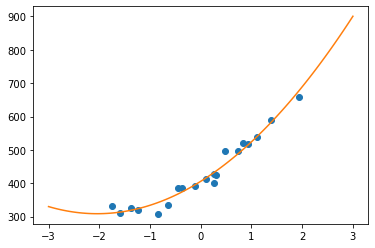

In [88]:
x = np.linspace(-3,3,100)
plt.plot(train_z,train_y,'o')
plt.plot(x,f(to_matrix(x)))
plt.show()

# 训练误差的迭代结果：
横轴：重复次数
纵轴：均方误差

In [89]:
# 均方误差
def MSE(x,y):
    return (1/x.shape[0])*np.sum((y-f(x))**2)

In [92]:
# 均方误差的历史记录
errors = []

#误差的差值
diff = 1

theta = np.random.rand(3)
#重复学习
errors.append(MSE(X,train_y))
while diff > 1e-2:
    #更新参数
    theta = theta - ETA * np.dot(f(X) - train_y, X)    # 直接用矩阵的乘法完成运算
    #计算与上一次误差的差值
    errors.append(MSE(X,train_y))
    diff = errors[-2] - errors[-1]


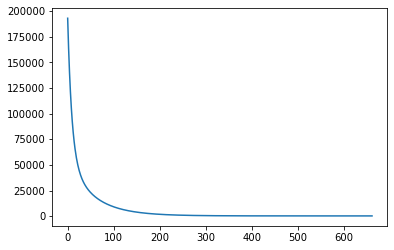

In [93]:
# 绘制误差变化图
x = np.arange(len(errors))

plt.plot(x,errors)
plt.show()

# 随机梯度下降法